In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

In [2]:
train_data=pd.read_csv('BigMart_Train.csv')
test_data=pd.read_csv('BigMart_Test.csv')

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_data.shape

(8523, 12)

In [5]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
test_data.shape

(5681, 11)

In [7]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
test_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [9]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [11]:
train_data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [12]:
train_data['Outlet_Age']=2020-train_data['Outlet_Establishment_Year']

In [13]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [14]:
train_data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [15]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,22.168133
std,4.643456,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,11.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,16.000000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,21.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,33.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,35.000000


In [16]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [17]:
train_data['Outlet_Size'].mode()[0]

'Medium'

In [18]:
train_data['Outlet_Size']=train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0])

In [19]:
train_data['Outlet_Size'].isnull().sum()

0

In [20]:
train_data['Item_Weight'].mean()

12.857645184136183

In [21]:
train_data['Item_Weight']=train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())

In [22]:
train_data['Item_Weight'].isnull().sum()

0

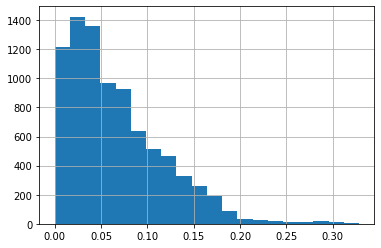

In [23]:
train_data['Item_Visibility'].hist(bins=20)

In [24]:
Q1=train_data['Item_Visibility'].quantile(0.25)
Q3=train_data['Item_Visibility'].quantile(0.75)
IQR=Q3-Q1
IQR

0.067595815

In [25]:
filter_train=train_data.query(('(@Q1-1.5*@IQR) <= Item_Visibility <= (@Q3+1.5*@IQR)'))

In [26]:
filter_train.shape

(8379, 13)

In [27]:
filter_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [28]:
filter_train.shape, train_data.shape

((8379, 13), (8523, 13))

In [29]:
train_data=filter_train

In [30]:
train_data.shape

(8379, 13)

In [31]:
train_data['Item_Visibility_bins']=pd.cut(train_data['Item_Visibility'],[0.000,0.065,0.13,0.2],
                                          labels=['low viz','viz','high viz'])

In [32]:
train_data['Item_Visibility_bins'].value_counts()

low viz     4403
viz         2557
high viz     893
Name: Item_Visibility_bins, dtype: int64

In [33]:
train_data['Item_Visibility_bins'].unique()

[low viz, NaN, viz, high viz]
Categories (3, object): [low viz < viz < high viz]

In [34]:
#train_data['Item_Visibility_bins'] = train_data['Item_Visibility_bins'].replace(np.NaN,'low viz',regex=True)
train_data['Item_Visibility_bins'] =train_data['Item_Visibility_bins'].fillna('low viz',inplace=True)

In [35]:
train_data['Item_Visibility_bins'].unique()

array([None], dtype=object)

In [36]:
train_data['Item_Visibility_bins'].value_counts()

Series([], Name: Item_Visibility_bins, dtype: int64)

In [37]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5016
Regular    2831
LF          307
reg         116
low fat     109
Name: Item_Fat_Content, dtype: int64

In [38]:
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace(['Low fat','LF'],'Low Fat')

In [39]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5323
Regular    2831
reg         116
low fat     109
Name: Item_Fat_Content, dtype: int64

In [40]:
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace(['Regular','reg'],'Regular')

In [41]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5323
Regular    2947
low fat     109
Name: Item_Fat_Content, dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [43]:
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat'], dtype=object)

In [44]:
train_data['Item_Fat_Content']=LE.fit_transform(train_data['Item_Fat_Content'])

In [45]:
train_data['Item_Visibility_bins']=LE.fit_transform(train_data['Item_Visibility_bins'])

In [46]:
train_data['Outlet_Size']=LE.fit_transform(train_data['Outlet_Size'])

In [47]:
train_data['Outlet_Location_Type']=LE.fit_transform(train_data['Outlet_Location_Type'])

In [48]:
train_data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store         939
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [49]:
dummy=pd.get_dummies(train_data['Outlet_Type'])

In [50]:
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [51]:
train_data=pd.concat([train_data,dummy],axis=1)

In [52]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,21,0,0,1,0,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,11,0,0,0,1,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,21,0,0,1,0,0
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,22,0,1,0,0,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,33,0,0,1,0,0


In [53]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Age                     int64
Item_Visibility_bins           int32
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [54]:
train_data=train_data.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Outlet_Establishment_Year'],axis=1)

In [55]:
train_data.dtypes

Item_Weight             float64
Item_Fat_Content          int32
Item_Visibility         float64
Item_MRP                float64
Outlet_Size               int32
Outlet_Location_Type      int32
Item_Outlet_Sales       float64
Outlet_Age                int64
Item_Visibility_bins      int32
Grocery Store             uint8
Supermarket Type1         uint8
Supermarket Type2         uint8
Supermarket Type3         uint8
dtype: object

In [56]:
X=train_data.drop('Item_Outlet_Sales',axis=1)
y=train_data['Item_Outlet_Sales']

In [57]:
test_data.shape

(5681, 11)

In [58]:
test_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [59]:
test_data['Outlet_Size']=test_data['Outlet_Size'].fillna('Medium')

In [60]:
test_data['Item_Visibility_bins']=pd.cut(test_data['Item_Visibility'],[0.000,0.065,0.13,0.2],
                                          labels=['low viz','viz','high viz'])

In [61]:
test_data['Item_Weight']=test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean())

In [62]:
test_data['Item_Visibility_bins']=test_data['Item_Visibility_bins'].fillna('low viz')

In [63]:
test_data['Item_Fat_Content']=LE.fit_transform(test_data['Item_Fat_Content'])
test_data['Item_Visibility_bins']=LE.fit_transform(test_data['Item_Visibility_bins'])
test_data['Outlet_Size']=LE.fit_transform(test_data['Outlet_Size'])
test_data['Outlet_Location_Type']=LE.fit_transform(test_data['Outlet_Location_Type'])
test_data['Outlet_Age']=LE.fit_transform(test_data['Outlet_Establishment_Year'])

In [64]:
dummy=pd.get_dummies(test_data['Outlet_Type'])

In [65]:
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1


In [66]:
test_data=pd.concat([test_data,dummy],axis=1)

In [67]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility_bins,Outlet_Age,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDW58,20.750000,1,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,Supermarket Type1,1,4,0,1,0,0
1,FDW14,8.300000,4,0.038428,Dairy,87.3198,OUT017,2007,1,1,Supermarket Type1,1,7,0,1,0,0
2,NCN55,14.600000,1,0.099575,Others,241.7538,OUT010,1998,1,2,Grocery Store,2,3,1,0,0,0
3,FDQ58,7.315000,1,0.015388,Snack Foods,155.0340,OUT017,2007,1,1,Supermarket Type1,1,7,0,1,0,0
4,FDY38,12.695633,2,0.118599,Dairy,234.2300,OUT027,1985,1,2,Supermarket Type3,2,0,0,0,0,1


In [68]:
test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Visibility_bins           int32
Outlet_Age                     int64
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [69]:
X_test=test_data.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Outlet_Establishment_Year'],axis=1)

In [70]:
X.columns,X_test.columns

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Age',
        'Item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Item_Visibility_bins',
        'Outlet_Age', 'Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
        'Supermarket Type3'],
       dtype='object'))

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=123)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5613, 12)
(2766, 12)
(5613,)
(2766,)


In [73]:
from sklearn.linear_model import LinearRegression
linReg=LinearRegression()

In [74]:
linReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
linReg.coef_

array([-6.64093271e-01,  4.15270301e+01, -2.64361770e+02,  1.54850013e+01,
       -5.99201626e+00, -1.32324190e+00, -1.26546997e+00,  0.00000000e+00,
       -1.69749184e+03,  2.09516300e+02, -1.10029205e+02,  1.59800474e+03])

In [76]:
linReg.intercept_

-65.29137577906204

In [77]:
y_pred=linReg.predict(X_test)
y_pred

array([2032.20097684, 2921.08022869, 4050.97406476, ..., 2137.14853982,
       3396.01464902,  839.13299716])

In [78]:
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(y_test,y_pred))

In [79]:
rmse

1163.7359203621736

In [80]:
from sklearn.linear_model import Ridge
RidgeModel=Ridge(alpha=0.001,normalize=True)

In [81]:
RidgeModel.fit(X_train,y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [108]:
y_pred2=RidgeModel.predict(X_test)
sqrt(mean_squared_error(y_test,y_pred2))

1163.816950442245